In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ch = pd.read_csv("Ch_ele.txt", delim_whitespace=True,
          header=None, names=["Elev","Index"])
tr = pd.read_csv("trace.txt", delim_whitespace=True,
          header=None, names=["GPR_points"])

N = 110
max = 0

for i in np.arange(1,N+1,1):
    tm = ch.loc[ch["Index"]==str(i),["Elev"]]
    size = np.size(tm)

    if(max < size):
        max = size
    
print("max number of GNSS points",max)

GNSS = np.zeros(shape=(N,size))

tm = ch.loc[ch["Index"]==str(1),["Elev"]]
tm_size = np.size(tm)
print("\"tm_size\" means the number of GNSS points")
print("tm_size=",tm_size)

for j in np.arange(0,tm_size,1):
    GNSS[0][j] = tm["Elev"][j]

#print(np.size(GNSS[0][0:tm_size]))
plt.plot(GNSS[0][0:tm_size], "ro-")


max number of GNSS points 147
"tm_size" means the number of GNSS points
tm_size= 87
"tm_size" means the number of GNSS points
tm_size= 72


KeyError: 0

G_point= 1547
Elev_ch2= 1547
itv=round(G_point/tm_size) 


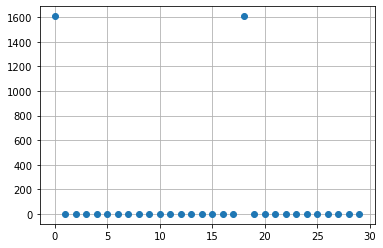

In [103]:
G_point = tr["GPR_points"][0]
print("G_point=",G_point)

ratio = tm_size / G_point

Elev_ch2 = np.zeros(shape=G_point)
Elev_ch3 = np.zeros(shape=G_point)

tm2 = np.zeros(shape=G_point)

print("Elev_ch2=",np.size(Elev_ch2))    

print("itv=round(G_point/tm_size) ")
itv = round(G_point/tm_size)


for j in np.arange(0,tm_size-1,1):
    Elev_ch2[j*itv] = tm["Elev"][j]
    Elev_ch3[j*itv] = tm["Elev"][j]
    
    #print(j*18)
Elev_ch2[-1] = GNSS[0][tm_size-1]
   
plt.plot(Elev_ch2[0:30],"o")    
plt.grid()

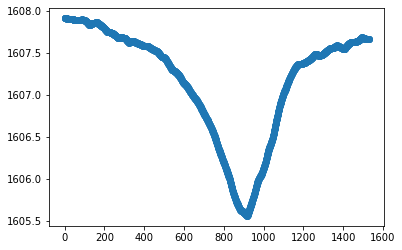

In [105]:
for j in np.arange(0,(tm_size-2)*itv,itv):    
    for i in np.arange(1,itv,1):       
        if(Elev_ch2[j]-Elev_ch2[j-itv] > 0):
            Elev_ch2[j+i] = Elev_ch2[j] + ( (i*0.05) * (Elev_ch2[j+itv] - Elev_ch2[j])/(0.05 * itv) )
                
        elif(Elev_ch2[j]-Elev_ch2[j-itv] < 0):
            Elev_ch2[j+i] = Elev_ch2[j] + ( (i*0.05) * (Elev_ch2[j+itv] - Elev_ch2[j])/(0.05 * itv) )                

plt.plot(Elev_ch2[:1530],"o")

1530


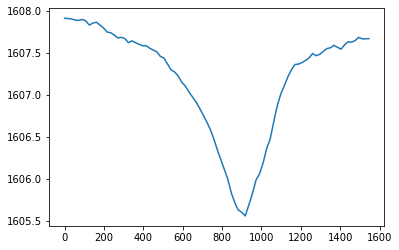

In [114]:
#for j in np.arange(0,(tm_size-2)*itv,itv):    
j = (tm_size-2)*itv
print(j)

for i in np.arange(1,G_point - j ,1):       
    if(Elev_ch2[j]-Elev_ch2[j-itv] > 0):
            Elev_ch2[j+i] = Elev_ch2[j] + ( (i*0.05) * (Elev_ch2[-1] - Elev_ch2[j])/(0.05 * itv) )
            #print(j+i)        
    elif(Elev_ch2[j]-Elev_ch2[j-itv] < 0):
            Elev_ch2[j+i] = Elev_ch2[j] + ( (i*0.05) * (Elev_ch2[-1] - Elev_ch2[j])/(0.05 * itv) )                
plt.plot(Elev_ch2)

In [ ]:
#insert last element
s_03 = np.append(s_02,s_02[-1]+16)

print("")
print(s_03)
print("s_03 size=",np.size(s_03))
print("The reason why we need s_03 is that s_02 do not reflect the last part of the Elev_ch03")

In [ ]:
"""
j=s_02[-1]+1
#print(j)
#print(G_point)
#print(G_point-j)
n = G_point - j

print(Elev_ch3[j-1])
print(Elev_ch3[j-n])
print(Elev_ch3[j-1] - Elev_ch3[j-n])

print("")
for i in np.arange(j,G_point,1): 
#        print(i)
        if(Elev_ch3[j-1]-Elev_ch3[j-n] > 0):
            Elev_ch3[i] = Elev_ch3[j-n] + ((i-j)*0.05) *(Elev_ch3[j-1] - Elev_ch3[j-n])/(0.05*n)
            
            
        elif(Elev_ch3[j-1]-Elev_ch3[j-n] < 0):
#            print(j-n)
            Elev_ch3[i] = Elev_ch3[j-n] + ((i-j)*0.05) *(Elev_ch3[j-1] - Elev_ch3[j-n])/(0.05*n)
#            print(Elev_ch3[j-n], Elev_ch3[j],j)
        #print(i, Elev_ch3[i])
"""

